In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/silver/df_meetings_lobbyists.csv")

In [3]:
df.head()

,member_id,meeting_date,member_capacity,lobbyist_id,l_category,l_head_office_country,l_agriculture,l_economics_and_trade,l_education,l_environment_and_climate,l_foreign_and_security_affairs,l_health,l_human_rights,l_infrastructure_and_industry,l_technology,l_ln_max_budget,l_days_since_registration
0,person/197502,2019-07-25,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.71015,841
1,person/197581,2019-09-17,Rapporteur,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.71015,895
2,person/197529,2019-09-17,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.71015,895
3,person/197589,2019-12-17,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.71015,986
4,person/197589,2019-12-17,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.71015,986


In [4]:
df.groupby("l_category").size()

l_category
Business    22427
NGOs        10966
Other        6950
dtype: int64

In [9]:
df_meetings = df.groupby(["member_id", "lobbyist_id", 'l_category']).size().reset_index(name='count')

array([[<Axes: title={'center': 'Business'}>,
        <Axes: title={'center': 'NGOs'}>],
       [<Axes: title={'center': 'Other'}>, <Axes: >]], dtype=object)

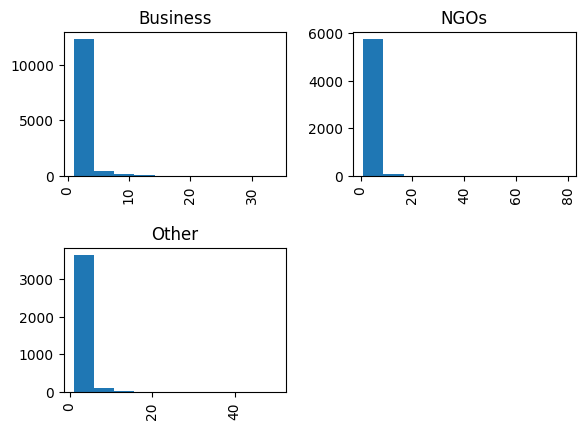

In [11]:
# give me a histogram of the count of meetings by category
df_meetings.hist(column='count', by='l_category')


<Axes: xlabel='l_ln_max_budget', ylabel='count'>

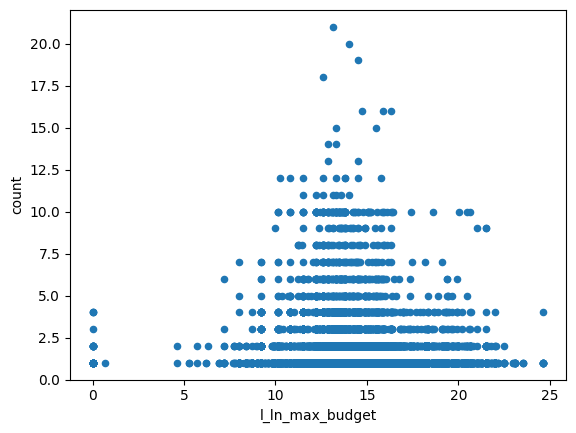

In [16]:
df.groupby(["lobbyist_id", "l_category", 'l_ln_max_budget', 'l_days_since_registration']).size().reset_index(name='count').plot(x='l_ln_max_budget', y='count', kind='scatter')

Total meetings by category:
  l_category  number_of_meetings
0   Business               22427
1       NGOs               10966
2      Other                6950


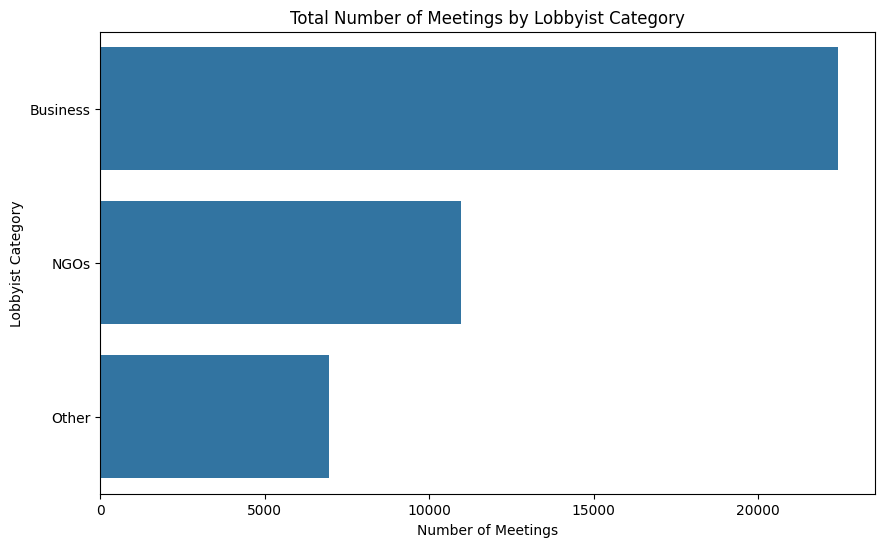

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Let's assume your dataframe is named 'df'
# df = pd.read_csv('your_data.csv') 

# Count meetings for each category
category_counts = df['l_category'].value_counts().reset_index()
category_counts.columns = ['l_category', 'number_of_meetings']

print("Total meetings by category:")
print(category_counts)

# Visualize the total counts
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts, x='number_of_meetings', y='l_category', orient='h')
plt.title('Total Number of Meetings by Lobbyist Category')
plt.xlabel('Number of Meetings')
plt.ylabel('Lobbyist Category')
plt.show()


Average meetings per lobbyist:
  l_category  total_meetings  unique_lobbyists  avg_meetings_per_lobbyist
0   Business           22427              2409                   9.309672
1       NGOs           10966              1271                   8.627852
2      Other            6950              1042                   6.669866


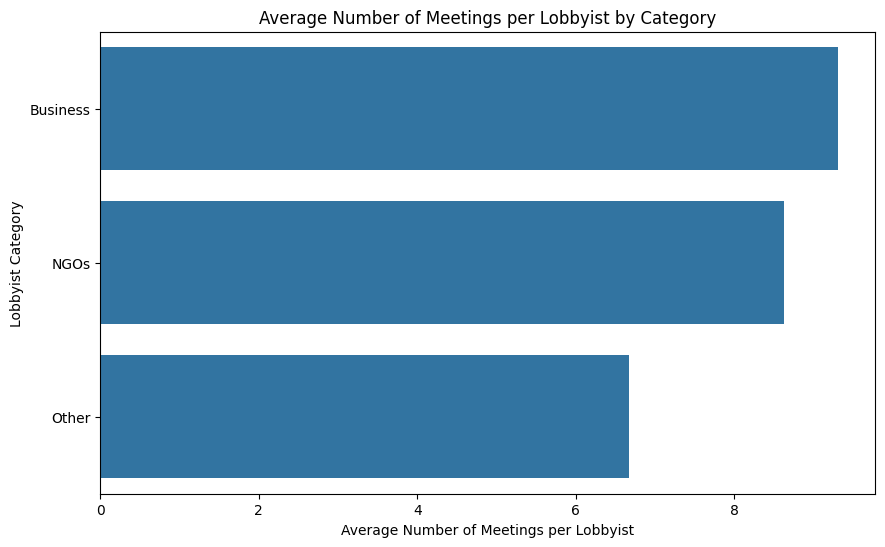

In [60]:

# Calculate total meetings and unique lobbyists for each category
meetings_per_lobbyist = (
    df.groupby("l_category")["lobbyist_id"]
    .agg(total_meetings="count", unique_lobbyists="nunique")
    .reset_index()
)

# Calculate the average
meetings_per_lobbyist["avg_meetings_per_lobbyist"] = (
    meetings_per_lobbyist["total_meetings"] / meetings_per_lobbyist["unique_lobbyists"]
)

print("\nAverage meetings per lobbyist:")
print(meetings_per_lobbyist.sort_values("avg_meetings_per_lobbyist", ascending=False))

# Visualize the average counts
plt.figure(figsize=(10, 6))
sns.barplot(
    data=meetings_per_lobbyist.sort_values(
        "avg_meetings_per_lobbyist", ascending=False
    ),
    x="avg_meetings_per_lobbyist",
    y="l_category",
    orient="h",
)
plt.title("Average Number of Meetings per Lobbyist by Category")
plt.xlabel("Average Number of Meetings per Lobbyist")
plt.ylabel("Lobbyist Category")
plt.show()

In [84]:
# Mean number of meetings per lobbyist-member pair (filtered)
mean_meetings = (
    df_meetings
    .groupby("l_category")["count"]
    .mean()
    .rename("mean_meetings_per_pair")
    .reset_index()
)

# Mean number of unique members per lobbyist
mean_unique_members = (
    df_meetings.groupby(['lobbyist_id', 'l_category'])['member_id']
    .nunique()
    .groupby('l_category')
    .mean()
    .rename("mean_unique_members_per_lobbyist")
    .reset_index()
)

# Join the two tables on l_category
summary_by_category = pd.merge(mean_meetings, mean_unique_members, on="l_category")

summary_by_category['total_meetings'] = summary_by_category['mean_meetings_per_pair'] * summary_by_category['mean_unique_members_per_lobbyist']
display(summary_by_category)

,l_category,mean_meetings_per_pair,mean_unique_members_per_lobbyist,total_meetings
0,Business,1.726748,5.391449,9.309672
1,NGOs,1.866871,4.621558,8.627852
2,Other,1.836681,3.631478,6.669866


In [101]:
total_persons = df_meetings.groupby(['lobbyist_id', 'l_category'])['member_id'].nunique()
total_meetings = df_meetings.groupby(['lobbyist_id'])['count'].sum()

summary_by_lobbyist = pd.merge(total_persons, total_meetings, on="lobbyist_id").rename(columns={"member_id": "total_persons", "count": "total_meetings"})

In [ ]:
cols = [
    "lobbyist_id",
    "l_category",
    "l_head_office_country",
    "l_agriculture",
    "l_economics_and_trade",
    "l_education",
    "l_environment_and_climate",
    "l_foreign_and_security_affairs",
    "l_health",
    "l_human_rights",
    "l_infrastructure_and_industry",
    "l_technology",
    "l_ln_max_budget",
    "l_days_since_registration",
]

summary_by_lobbyist = summary_by_lobbyist.merge(
    df[cols].drop_duplicates("lobbyist_id"), on="lobbyist_id", how="left"
)

In [126]:
import statsmodels.formula.api as smf
import numpy as np

# To address the LinAlgError: SVD did not converge, we will:
# 1. Remove rows with missing or infinite values in the relevant columns.
# 2. Drop columns with zero variance (constant columns).
# 3. Optionally, add a small amount of noise to columns with near-zero variance.

# Define the columns used in the regression
regression_columns = [
    "l_category",
    "total_meetings",
    "l_ln_max_budget",
    "l_agriculture",
    "l_economics_and_trade",
    "l_education",
    "l_environment_and_climate",
    "l_foreign_and_security_affairs",
    "l_health",
    "l_human_rights",
    "l_infrastructure_and_industry",
    "l_technology",
    "l_head_office_country",
]

# Remove rows with missing or infinite values in regression columns
df_reg = summary_by_lobbyist[regression_columns].replace([np.inf, -np.inf], np.nan).dropna()

# Drop columns with zero variance (constant columns)
cols_to_use = []
for col in df_reg.columns:
    if col == "l_category":
        cols_to_use.append(col)
    else:
        if df_reg[col].nunique() > 1:
            cols_to_use.append(col)

# Prepare the formula
controls = [col for col in cols_to_use if col not in ["total_meetings", "l_category"]]
formula = f"total_meetings ~ l_category"
if controls:
    formula += " + " + " + ".join(controls)

# Fit the model
model = smf.ols(formula, data=df_reg).fit()

# Predict and calculate residuals for the cleaned data
summary_by_lobbyist.loc[df_reg.index, "predicted_meetings"] = model.predict(df_reg)
summary_by_lobbyist.loc[df_reg.index, "residuals"] = (
    summary_by_lobbyist.loc[df_reg.index, "total_meetings"] - summary_by_lobbyist.loc[df_reg.index, "predicted_meetings"]
)

summary_by_lobbyist.sort_values(by="residuals", ascending=False).head(10)

,lobbyist_id,total_persons,total_meetings,l_category,l_head_office_country,l_agriculture,l_economics_and_trade,l_education,l_environment_and_climate,l_foreign_and_security_affairs,l_health,l_human_rights,l_infrastructure_and_industry,l_technology,l_ln_max_budget,l_days_since_registration,predicted_meetings,residuals
177,03181945560-59,99,229,Business,UNITED STATES,0,1,1,1,1,1,1,1,1,15.607270,3067,19.282048,209.717952
337,06698681039-26,79,218,Other,BELGIUM,0,1,1,1,1,1,1,1,1,14.508658,3822,14.835729,203.164271
341,06798511314-27,89,215,NGOs,BELGIUM,1,1,0,1,1,0,0,1,1,15.538348,3784,15.160060,199.839940
390,07595112423-87,32,198,Other,GERMANY,0,1,1,1,1,1,1,1,1,13.017005,3583,10.649986,187.350014
697,1414929419-24,49,198,NGOs,BELGIUM,1,1,0,1,1,1,1,1,1,15.488225,3948,18.907508,179.092492
414,0801162959-21,67,171,Business,UNITED STATES,0,1,1,1,1,1,1,1,1,15.894952,3823,19.622848,151.377152
1842,3978240953-79,95,167,Business,BELGIUM,0,1,1,1,1,1,1,1,1,15.319588,3905,20.602681,146.397319
2780,588327811384-96,78,145,Business,UNITED STATES,0,1,1,1,0,0,1,1,1,15.894952,2371,16.767852,128.232148
522,10439809375-73,39,139,NGOs,UNITED KINGDOM,1,1,1,1,1,0,1,1,1,16.304575,2590,14.085300,124.914700
2866,60404068097-81,33,136,NGOs,GERMANY,1,1,1,1,1,1,1,1,1,18.153094,2833,19.415382,116.584618


In [127]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_meetings   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6.572
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           2.37e-62
Time:                        12:04:30   Log-Likelihood:                -19154.
No. Observations:                4647   AIC:                         3.847e+04
Df Residuals:                    4566   BIC:                         3.899e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -16.3163      6.304     -2.588      0.010     -28.675      -3.957
l_category[T.NGOs]                                         -1.8504      0.630     -2.935      0.003      -3.086      -0.615
l_category[T.Other]                                        -4.8063      0.615     -7.811      0.000      -6.013      -3.600
l_head_office_country[T.AUSTRIA]                            3.4793      6.315      0.551      0.582      -8.900      15.859
l_head_office_country[T.BARBADOS]                          -1.5622     16.285     -0.096      0.924     -33.488      30.364
l_head_office_country[T.BELGIUM]                            7.6299      6.174      1.236      0.217      -4.475      19.734
l_head_office_country[T.BRAZIL]                            -1.5311     10.654     -0.144      0.886     -22.419      19.357
l_head_office_country[T.BULGARIA]                           0.4714     12.318      0.038      0.969     -23.678      24.621
l_head_office_country[T.CANADA]                             1.6369      7.285      0.225      0.822     -12.646      15.920
l_head_office_country[T.CHINA]                              9.7502      9.127      1.068      0.285      -8.143      27.643
l_head_office_country[T.COLOMBIA]                          -2.1341     16.286     -0.131      0.896     -34.063      29.795
l_head_office_country[T.COSTA RICA]                        -1.2920     16.301     -0.079      0.937     -33.249      30.665
l_head_office_country[T.CROATIA]                            0.8760      7.018      0.125      0.901     -12.883      14.635
l_head_office_country[T.CYPRUS]                             6.7864     10.651      0.637      0.524     -14.095      27.668
l_head_office_country[T.CZECH REPUBLIC]                     2.1474      6.554      0.328      0.743     -10.701      14.996
l_head_office_country[T.DENMARK]                            7.1759      6.341      1.132      0.258      -5.256      19.608
l_head_office_country[T.ESTONIA]                            1.8258      7.784      0.235      0.815     -13.434      17.086
l_head_office_country[T.FINLAND]                            8.8628      6.285      1.410      0.159      -3.459      21.184
l_head_office_country[T.FRANCE]                             5.1407      6.199      0.829      0.407      -7.013      17.294
l_head_office_country[T.GEORGIA]                           -2.8615     12.302     -0.233      0.816     -26.979      21.257
l_head_office_country[T.GERMANY]                            5.2112      6.182      0.843      0.399      -6.908      17.330
l_head_office_country[T.GHANA]                             -1.4548     12.305     -0.118      0.906     -25